In [18]:
import sys
sys.path.insert(0, 'pypfopt')
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier
from pypfopt import plotting
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [19]:
script_start_time = time.time()

# Preparing Data

In [20]:
df = pd.read_excel(r'cw2023AP.xlsx',index_col = 0)

In [21]:
df18 = df['2000-12-29' : '2018-10-01']
df23 = df['2018-09-28' : '2023-09-29']

In [22]:
stocks = ['BUNZL',
       'ROLLS-ROYCE HOLDINGS',
       'FULLER SMITH & TURNR.', 'BAE SYSTEMS',
       'SEVERN TRENT']

In [23]:
stocks

['BUNZL',
 'ROLLS-ROYCE HOLDINGS',
 'FULLER SMITH & TURNR.',
 'BAE SYSTEMS',
 'SEVERN TRENT']

In [24]:
rs18 = ((df18[stocks]/df18[stocks].shift(1))-1).dropna()
rs23 = ((df23[stocks]/df23[stocks].shift(1))-1).dropna()

mu18 = rs18.mean(axis=0)
mu23 = rs23.mean(axis=0)

anmu18 = mu18 * 12
anmu23 = mu23 * 12

In [25]:
cov18 = rs18.cov()
cov23 = rs23.cov()

# Risk Free Rates

In [26]:
ukmid18 = df18['UK STERLING 1M DEPOSIT (FT/RFV) - MIDDLE RATE']
r18 = ukmid18.mean()/100
r18

0.024231537383177567

In [27]:
ukmid23 = df23['UK STERLING 1M DEPOSIT (FT/RFV) - MIDDLE RATE']
r23 = ukmid23.mean()/100
r23

0.013304098360655738

# Optimum Portfolios

## opt23

In [28]:
mu = anmu23
S = cov23 * np.sqrt(12)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe(risk_free_rate = r23)
ef.portfolio_performance(verbose=True, risk_free_rate = r23)

dicti = weights
opt23 = np.array(list(dicti.values()))
weights

Expected annual return: 9.5%
Annual volatility: 8.7%
Sharpe Ratio: 0.93


OrderedDict([('BUNZL', 0.0795491392133907),
             ('ROLLS-ROYCE HOLDINGS', 0.0234967010768588),
             ('FULLER SMITH & TURNR.', 0.0),
             ('BAE SYSTEMS', 0.4675962074915879),
             ('SEVERN TRENT', 0.4293579522181626)])

## min23

In [29]:
mu = anmu23
S = cov23*np.sqrt(12)

ef = EfficientFrontier(mu, S)
weights = ef.min_volatility()
ef.portfolio_performance(verbose=True, risk_free_rate = r23)

dicti = weights
min23 = np.array(list(dicti.values()))
weights

Expected annual return: 7.5%
Annual volatility: 7.8%
Sharpe Ratio: 0.79


OrderedDict([('BUNZL', 0.2255455410824918),
             ('ROLLS-ROYCE HOLDINGS', 0.0340857594803544),
             ('FULLER SMITH & TURNR.', 0.0460794987560544),
             ('BAE SYSTEMS', 0.2206889336120224),
             ('SEVERN TRENT', 0.4736002670690769)])

## Efficient Frontier 2022

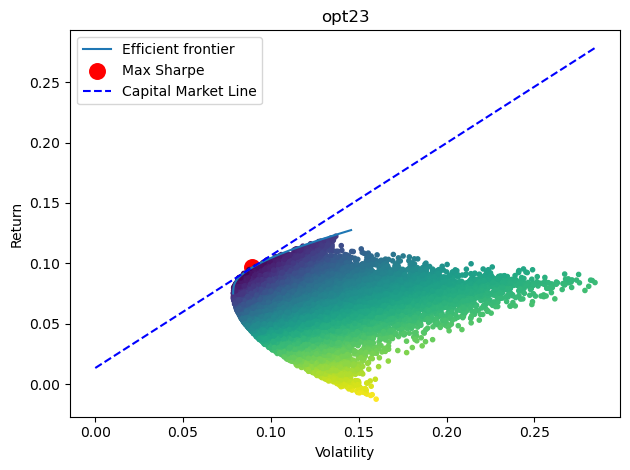

In [30]:
mu = anmu23
S = cov23*np.sqrt(12)

rfr = r23

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker=".", s=500, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 25000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Define the risk-free rate
risk_free_rate = rfr  # Adjust this to your actual risk-free rate

# Calculate the slope and intercept for the CML
slope_cml = (ret_tangent - risk_free_rate) / std_tangent
intercept_cml = risk_free_rate

# Plot the Capital Market Line
x_vals_cml = np.linspace(0, max(stds), 100)
y_vals_cml = slope_cml * x_vals_cml + intercept_cml
ax.plot(x_vals_cml, y_vals_cml, linestyle="--", color="blue", label="Capital Market Line")

# Output
ax.set_title("opt23")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=600)
plt.show()

In [31]:
std_tangent

0.08935314624485324

## opt18

In [32]:
# Calculate expected returns and sample covariance
mu = anmu18
S = cov18*np.sqrt(12)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe(risk_free_rate = r18)
ef.portfolio_performance(verbose=True, risk_free_rate = r18)

dicti = weights
opt18 = np.array(list(dicti.values()))
weights

Expected annual return: 12.3%
Annual volatility: 7.6%
Sharpe Ratio: 1.29


OrderedDict([('BUNZL', 0.3707477819849016),
             ('ROLLS-ROYCE HOLDINGS', 0.1448735708191483),
             ('FULLER SMITH & TURNR.', 0.3694108005400961),
             ('BAE SYSTEMS', 0.0),
             ('SEVERN TRENT', 0.114967846655854)])

## min18

In [33]:
mu = anmu18
S = cov18*np.sqrt(12)

ef = EfficientFrontier(mu, S)
weights = ef.min_volatility()
ef.portfolio_performance(verbose=True, risk_free_rate = r18)

dicti = weights
min18 = np.array(list(dicti.values()))
weights

Expected annual return: 9.6%
Annual volatility: 6.7%
Sharpe Ratio: 1.08


OrderedDict([('BUNZL', 0.263992781344319),
             ('ROLLS-ROYCE HOLDINGS', 0.0035447638744049),
             ('FULLER SMITH & TURNR.', 0.2580557367683748),
             ('BAE SYSTEMS', 0.1128197238456935),
             ('SEVERN TRENT', 0.361586994167208)])

## Efficient Frontier 2018

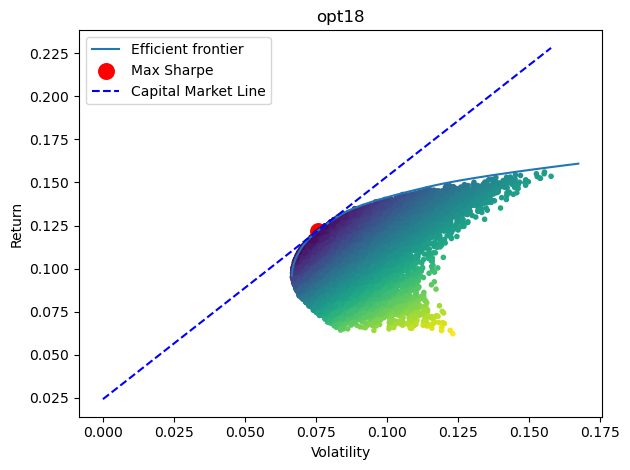

In [34]:
mu = anmu18
S = cov18*np.sqrt(12)

rfr = r18

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker=".", s=500, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 25000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Define the risk-free rate
risk_free_rate = rfr  # Adjust this to your actual risk-free rate

# Calculate the slope and intercept for the CML
slope_cml = (ret_tangent - risk_free_rate) / std_tangent
intercept_cml = risk_free_rate

# Plot the Capital Market Line
x_vals_cml = np.linspace(0, max(stds), 100)
y_vals_cml = slope_cml * x_vals_cml + intercept_cml
ax.plot(x_vals_cml, y_vals_cml, linestyle="--", color="blue", label="Capital Market Line")

# Output
ax.set_title("opt18")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=600)
plt.show()

In [35]:
script_end_time = time.time()
execution_time = script_end_time - script_start_time

print(f"Total Time Elapsed: {execution_time:.1f} seconds")

Total Time Elapsed: 6.8 seconds
